# Pre-processing and Training Data Development

Create a cleaned development dataset that can be used to complete Modeling of this project

In [1]:
# Import
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import os
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import stem

In [2]:
os.getcwd()

'C:\\Users\\piyus\\Desktop\\Guided Capstone-Springboard\\3Capstone 3-Tag Classification of Stackoverflow'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Data Wrangling and Exploratory Data Analysis.ipynb',
 'Pre-processing,Training Data Development and Modeling.ipynb',
 'reports']

In [4]:
df = pd.read_csv(".\data\Stackoverflow_cleaned.csv")

In [5]:
df.shape

(1455256, 9)

In [6]:
df.sample(5)

,Unnamed: 0,Q_Score,A_Score,Id,CreationYear,Title,Q_Body,Tag,A_Body
274474,338828,0,2,7636160,2011,return function mathrandom,pwhat range of numbers seriously i got headach...,actionscript-3,integer 0 included mathrandom return value 0 1...
123108,151974,1,2,3603380,2010,target input 5 characters ent,pwhat i want to do is take an input for a zipc...,"javascript, jquery, html",zip scenario zipkeypressfunction thisval ampam...
895284,1068710,-1,1,24388750,2014,powershell add header record,pi have a process in ssis where i create three...,"powershell, append, prepend",something seems easy reality due underlying fi...
1450317,1695861,0,0,39998830,2016,untar subfolders folder linux,pi have a directory codelandsatdatacode which ...,"linux, directory, tar",might parse filenames cd directories running t...
506737,616594,2,0,13775720,2012,use conditional operator incorrect,pi get a compilation error while trying to com...,java,adding jon skeet said ternary operator youre u...


In [7]:
df.Tag.value_counts()

java                                                       11384
javascript, jquery                                         10894
android                                                     9931
javascript                                                  9756
php                                                         9680
                                                           ...  
javascript, java, android, cordova, angularjs-directive        1
c#, wcf, proxy-classes, endpoints, multiple-projects           1
java, caching, java-ee, webpage, ehcache                       1
python, c++, qt, user-interface, fortran                       1
search, lucene, full-text-search                               1
Name: Tag, Length: 511517, dtype: int64

In [8]:
stop_words = stopwords.words('english')
nltk.download('stopwords')
nltk.download('punkt')

stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if len(token) < 20 ]
    return ' '.join(stemmed_tokens)

df['Q_Body'] = df['Q_Body'].apply(stem_sentences)
df['A_Body'] = df['A_Body'].apply(stem_sentences)
df.shape[0]

1455256

In [10]:
df.dtypes

Unnamed: 0       int64
Q_Score          int64
A_Score          int64
Id               int64
CreationYear     int64
Title           object
Q_Body          object
Tag             object
A_Body          object
dtype: object

In [11]:
df.head()

,Unnamed: 0,Q_Score,A_Score,Id,CreationYear,Title,Q_Body,Tag,A_Body
0,0,7,1,2750,2008,data verifications gettersetter elsewher,pim wonder if it a good idea to make in strong...,"optimization, setter, getter, verification",valid captur separ getter setter valid method ...
1,1,7,3,2750,2008,data verifications gettersetter elsewher,pim wonder if it a good idea to make in strong...,"optimization, setter, getter, verification",perspect maintain code think much valid setter...
2,2,7,3,2750,2008,data verifications gettersetter elsewher,pim wonder if it a good idea to make in strong...,"optimization, setter, getter, verification",depend gener code fail fast valu set multipl p...
3,3,7,1,2750,2008,data verifications gettersetter elsewher,pim wonder if it a good idea to make in strong...,"optimization, setter, getter, verification",might wanna check domain driven design eric ev...
4,4,7,1,2750,2008,data verifications gettersetter elsewher,pim wonder if it a good idea to make in strong...,"optimization, setter, getter, verification",like implement idataerrorinfo put valid logic ...


__1. Standardize the magnitude of numeric features using a scaler__

In [12]:
# Create subset of only Numeric columns
df_numeric = df.select_dtypes(include=['int64','float'])
print(df_numeric.columns)

Index(['Unnamed: 0', 'Q_Score', 'A_Score', 'Id', 'CreationYear'], dtype='object')


In [13]:
# Create subset of only Categorical variable columns
df_categorical = df.select_dtypes(include=['object'])
print(df_categorical.columns)

Index(['Title', 'Q_Body', 'Tag', 'A_Body'], dtype='object')


In [14]:
df_numeric[['Q_Score','A_Score']].describe()

,Q_Score,A_Score
count,1.455256e+06,1.455256e+06
mean,9.834283e-01,1.038645e+00
std,1.674261e+00,1.273146e+00
min,-4.000000e+00,-3.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00
max,7.000000e+00,5.000000e+00


In [15]:
# Instantiate StandardScaler to generate absolute values that are mapped in the range [0, 1].
# This is optional step for our dataset since there are not many outliers, however, this condenses data even better

scaler = MaxAbsScaler()

# Fit SS_scaler to the data
scaler.fit(df_numeric[['Q_Score','A_Score']])

# Transform the data using the fitted scaler
df_numeric[['Q_Score_scaled','A_Score_scaled']] = scaler.transform(df_numeric[['Q_Score','A_Score']])

# Compare the origional and transformed column
print(df_numeric[['Q_Score_scaled','A_Score_scaled']].head())

   Q_Score_scaled  A_Score_scaled
0             1.0             0.2
1             1.0             0.6
2             1.0             0.6
3             1.0             0.2
4             1.0             0.2


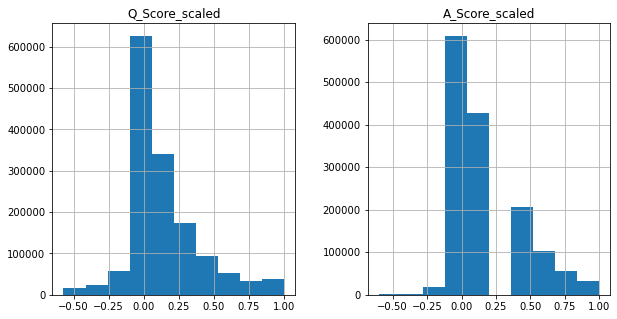

In [16]:
# Create a histogram
plt.rcParams["figure.figsize"] = (10,5)

df_numeric.hist(['Q_Score_scaled','A_Score_scaled'])
plt.show()

In [17]:
df_numeric[['Q_Score_scaled','A_Score_scaled']].describe()

,Q_Score_scaled,A_Score_scaled
count,1.455256e+06,1.455256e+06
mean,1.404898e-01,2.077289e-01
std,2.391802e-01,2.546291e-01
min,-5.714286e-01,-6.000000e-01
25%,0.000000e+00,0.000000e+00
50%,1.428571e-01,2.000000e-01
75%,2.857143e-01,4.000000e-01
max,1.000000e+00,1.000000e+00


In [19]:
df_numeric_scaled = pd.concat([df_categorical, df_numeric], axis=1, sort=False)
df_numeric_scaled.head()

,Title,Q_Body,Tag,A_Body,Unnamed: 0,Q_Score,A_Score,Id,CreationYear,Q_Score_scaled,A_Score_scaled
0,data verifications gettersetter elsewher,pim wonder if it a good idea to make in strong...,"optimization, setter, getter, verification",valid captur separ getter setter valid method ...,0,7,1,2750,2008,1.0,0.2
1,data verifications gettersetter elsewher,pim wonder if it a good idea to make in strong...,"optimization, setter, getter, verification",perspect maintain code think much valid setter...,1,7,3,2750,2008,1.0,0.6
2,data verifications gettersetter elsewher,pim wonder if it a good idea to make in strong...,"optimization, setter, getter, verification",depend gener code fail fast valu set multipl p...,2,7,3,2750,2008,1.0,0.6
3,data verifications gettersetter elsewher,pim wonder if it a good idea to make in strong...,"optimization, setter, getter, verification",might wanna check domain driven design eric ev...,3,7,1,2750,2008,1.0,0.2
4,data verifications gettersetter elsewher,pim wonder if it a good idea to make in strong...,"optimization, setter, getter, verification",like implement idataerrorinfo put valid logic ...,4,7,1,2750,2008,1.0,0.2


In [20]:
df_numeric_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455256 entries, 0 to 1455255
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Title           1455256 non-null  object 
 1   Q_Body          1455256 non-null  object 
 2   Tag             1455253 non-null  object 
 3   A_Body          1455256 non-null  object 
 4   Unnamed: 0      1455256 non-null  int64  
 5   Q_Score         1455256 non-null  int64  
 6   A_Score         1455256 non-null  int64  
 7   Id              1455256 non-null  int64  
 8   CreationYear    1455256 non-null  int64  
 9   Q_Score_scaled  1455256 non-null  float64
 10  A_Score_scaled  1455256 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 122.1+ MB


In [21]:
df_question = df_numeric_scaled.drop(columns=['Title', 'A_Body', 'Unnamed: 0', 'Id', 'Q_Score_scaled','A_Score_scaled','Q_Score','A_Score'])
print(df_question.head())

                                              Q_Body  \
0  pim wonder if it a good idea to make in strong...   
1  pim wonder if it a good idea to make in strong...   
2  pim wonder if it a good idea to make in strong...   
3  pim wonder if it a good idea to make in strong...   
4  pim wonder if it a good idea to make in strong...   

                                          Tag  CreationYear  
0  optimization, setter, getter, verification          2008  
1  optimization, setter, getter, verification          2008  
2  optimization, setter, getter, verification          2008  
3  optimization, setter, getter, verification          2008  
4  optimization, setter, getter, verification          2008  


__2. Split Tag column into multiple columns delimited by comma (',')__

In [22]:
df_question_tag_split = df_question['Tag'].str.split(',').apply(pd.Series)

In [23]:
df_question_tags = df_question_tag_split.replace(np.nan,0).drop_duplicates()
df_question_tags.head(2)

,0,1,2,3,4
0,optimization,setter,getter,verification,0
7,windows,64bit,wmi,0,0


In [24]:
print(df_question_tags.shape[0], df_question.shape[0])

511518 1455256


In [25]:
df_merged = pd.concat([df_question, df_question_tags], axis = 1, sort=False)
df_merged.shape[0]

1455256

In [26]:
df_merged = df_merged.drop_duplicates().dropna()

In [27]:
df_merged.shape[0]

511517

In [28]:
df_merged = df_merged.rename(columns={0:'Tag1',1:'Tag2',2:'Tag3',3:'Tag4',4:'Tag5'}).drop(columns={'Tag'})
print(df_merged.shape[0], df_merged.head())

511517                                                Q_Body  CreationYear  \
0   pim wonder if it a good idea to make in strong...          2008   
7   pive been work on a project that access the wm...          2008   
9   pive been task with redesign part of a mssql d...          2008   
13  pi it accept to have an strongaspnet 20strong ...          2008   
18  pi have a situat where i want to add hour to a...          2008   

            Tag1                   Tag2               Tag3           Tag4 Tag5  
0   optimization                 setter             getter   verification    0  
7        windows                  64bit                wmi              0    0  
9            sql             sql-server           database        diagram    0  
13       asp.net   business-logic-layer   objectdatasource              0    0  
18        vb.net                   date                  0              0    0  


 __3. Perform TF-IDF on Categorical features (columns) to fit and transform data__
 - We also want a measure of how unique a word is i.e. how infrequently the word occurs across all documents (inverse document frequency or idf). So, the product of tf & idf (TF-IDF) of a word gives a product of how frequent this word is in the document multiplied by how unique the word is w.r.t. the entire corpus of documents.
 - Words in the document with a high tfidf score occur frequently in the document and provide the most information about that specific document.
 
 __TFIDF on:__
 - Question body and Tags
 
 Furthermore, create dataframes with the vectorized values before performing Modeling step

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer = TfidfVectorizer(max_features=200, ngram_range=(1, 1), stop_words = 'english')

In [30]:
tfidf_question= vectorizer.fit_transform(df_merged['Q_Body'])

# Create a DataFrame with these features
tv_df_question = pd.DataFrame(tfidf_question.toarray(), 
                     columns=vectorizer.get_feature_names())

print(tv_df_question.head())

         10  abl    access       ad      add       ani  anoth     anyon  app  \
0  0.000000  0.0  0.000000  0.00000  0.00000  0.000000    0.0  0.000000  0.0   
1  0.131992  0.0  0.122329  0.00000  0.00000  0.000000    0.0  0.000000  0.0   
2  0.000000  0.0  0.000000  0.00000  0.00000  0.000000    0.0  0.271154  0.0   
3  0.000000  0.0  0.000000  0.00000  0.00000  0.000000    0.0  0.000000  0.0   
4  0.000000  0.0  0.000000  0.33719  0.12265  0.044166    0.0  0.000000  0.0   

     applic  ...      view  void   wa      want  way  web  whi    window  \
0  0.000000  ...  0.000000   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000   
1  0.000000  ...  0.000000   0.0  0.0  0.074416  0.0  0.0  0.0  0.371078   
2  0.000000  ...  0.563637   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000   
3  0.181525  ...  0.000000   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000   
4  0.000000  ...  0.000000   0.0  0.0  0.167940  0.0  0.0  0.0  0.000000   

       work  write  
0  0.000000    0.0  
1  0.216495    0.0  

In [31]:
sample_row = tv_df_question.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

make       0.503326
code       0.389386
databas    0.321533
think      0.319718
idea       0.318798
Name: 0, dtype: float64


In [32]:
df_final = pd.concat([tv_df_question, df_merged], axis = 1, sort=False)

In [33]:
df_final.head(2)

,10,abl,access,ad,add,ani,anoth,anyon,app,applic,...,window,work,write,Q_Body,CreationYear,Tag1,Tag2,Tag3,Tag4,Tag5
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,pim wonder if it a good idea to make in strong...,2008.0,optimization,setter,getter,verification,0
1,0.131992,0.0,0.122329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.371078,0.216495,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_final = df_final.drop(columns={'Q_Body'})
print(df_final.shape[0], df_final.head())

841859          10  abl    access       ad      add       ani  anoth     anyon  app  \
0  0.000000  0.0  0.000000  0.00000  0.00000  0.000000    0.0  0.000000  0.0   
1  0.131992  0.0  0.122329  0.00000  0.00000  0.000000    0.0  0.000000  0.0   
2  0.000000  0.0  0.000000  0.00000  0.00000  0.000000    0.0  0.271154  0.0   
3  0.000000  0.0  0.000000  0.00000  0.00000  0.000000    0.0  0.000000  0.0   
4  0.000000  0.0  0.000000  0.33719  0.12265  0.044166    0.0  0.000000  0.0   

     applic  ...  whi    window      work  write  CreationYear          Tag1  \
0  0.000000  ...  0.0  0.000000  0.000000    0.0        2008.0  optimization   
1  0.000000  ...  0.0  0.371078  0.216495    0.0           NaN           NaN   
2  0.000000  ...  0.0  0.000000  0.000000    0.0           NaN           NaN   
3  0.181525  ...  0.0  0.000000  0.000000    0.0           NaN           NaN   
4  0.000000  ...  0.0  0.000000  0.040715    0.0           NaN           NaN   

      Tag2     Tag3           T

In [35]:
df_final = df_final.dropna()
print(df_final.shape[0], df_final.head())

181175      10  abl  access   ad       add  ani  anoth  anyon  app    applic  ...  \
0   0.0  0.0     0.0  0.0  0.000000  0.0    0.0    0.0  0.0  0.000000  ...   
7   0.0  0.0     0.0  0.0  0.133755  0.0    0.0    0.0  0.0  0.000000  ...   
9   0.0  0.0     0.0  0.0  0.000000  0.0    0.0    0.0  0.0  0.227790  ...   
13  0.0  0.0     0.0  0.0  0.000000  0.0    0.0    0.0  0.0  0.000000  ...   
18  0.0  0.0     0.0  0.0  0.205880  0.0    0.0    0.0  0.0  0.197095  ...   

    whi    window  work     write  CreationYear          Tag1  \
0   0.0  0.000000   0.0  0.000000        2008.0  optimization   
7   0.0  0.000000   0.0  0.000000        2008.0       windows   
9   0.0  0.000000   0.0  0.516278        2008.0           sql   
13  0.0  0.732612   0.0  0.000000        2008.0       asp.net   
18  0.0  0.000000   0.0  0.000000        2008.0        vb.net   

                     Tag2               Tag3           Tag4  Tag5  
0                  setter             getter   verification     0

In [36]:
df_final.dtypes

10        float64
abl       float64
access    float64
ad        float64
add       float64
           ...   
Tag1       object
Tag2       object
Tag3       object
Tag4       object
Tag5       object
Length: 206, dtype: object

__4. Convert categorical variables into numeric variables__

In [37]:
print(df_final['Tag1'].value_counts().head(5), df_final['Tag2'].value_counts().head(5), 
      df_final['Tag3'].value_counts().head(5), df_final['Tag4'].value_counts().head(5), 
      df_final['Tag5'].value_counts().head(5))

c#            18329
java          15613
php           12675
javascript    10157
c++            7669
Name: Tag1, dtype: int64  jquery     3773
 .net       3704
 asp.net    2722
0           2598
 html       2441
Name: Tag2, dtype: int64 0        30226
 html      965
 ios       827
 ajax      728
 css       683
Name: Tag3, dtype: int64 0        93773
 json      205
 ajax      186
 ipad      169
 css       165
Name: Tag4, dtype: int64 0                  148183
 cordova               41
 post                  35
 css3                  35
 drop-down-menu        35
Name: Tag5, dtype: int64


In [38]:
# Pick top 10 tags and apply one hot encoding on the dataframe to assign true/ false based on top 10 tag being found or not 
# for every questions across dataframe
# drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. 
# which reduces the correlations created among dummy variables.

tags = ['c#','java','php','javascript','c++','.net','asp.net','html','ios','ajax']
df_tag = df_final[['Tag1','Tag2','Tag3','Tag4','Tag5']]
final_top_10_tags= pd.get_dummies(df_tag.isin(tags), drop_first=True)

df_ques = df_final.drop(['Tag1','Tag2','Tag3','Tag4','Tag5'], axis=1)

df_final = pd.concat([df_ques, final_top_10_tags], axis=1)
print(df_final.head(2), df_final.shape[0])

    10  abl  access   ad       add  ani  anoth  anyon  app  applic  ...  whi  \
0  0.0  0.0     0.0  0.0  0.000000  0.0    0.0    0.0  0.0     0.0  ...  0.0   
7  0.0  0.0     0.0  0.0  0.133755  0.0    0.0    0.0  0.0     0.0  ...  0.0   

   window  work  write  CreationYear   Tag1   Tag2   Tag3   Tag4   Tag5  
0     0.0   0.0    0.0        2008.0  False  False  False  False  False  
7     0.0   0.0    0.0        2008.0  False  False  False  False  False  

[2 rows x 206 columns] 181175


In [39]:
df_final[['Tag1','Tag2','Tag3','Tag4','Tag5']] *= 1
df_final.sample(2)

,10,abl,access,ad,add,ani,anoth,anyon,app,applic,...,whi,window,work,write,CreationYear,Tag1,Tag2,Tag3,Tag4,Tag5
335294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2012.0,1,0,0,0,0
357999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2012.0,1,0,0,0,0


__5. Training data development and Feature Selection__

In [40]:
from sklearn.model_selection import train_test_split

train_question_df, test_question_df = train_test_split(df_final, test_size=0.3)

In [41]:
print(train_question_df.shape[0], test_question_df.shape[0])

126822 54353


In [42]:
X = train_question_df.loc[:, '10':'write']
y = train_question_df.loc[:, 'Tag1':'Tag5']
print(X.head(2), y.head(2))

         10  abl  access   ad  add  ani  anoth  anyon  app  applic  ...  view  \
378891  0.0  0.0     0.0  0.0  0.0  0.0    0.0    0.0  0.0     0.0  ...   0.0   
133330  0.0  0.0     0.0  0.0  0.0  0.0    0.0    0.0  0.0     0.0  ...   0.0   

        void   wa  want  way  web  whi  window  work  write  
378891   0.0  0.0   0.0  0.0  0.0  0.0     0.0   0.0    0.0  
133330   0.0  0.0   0.0  0.0  0.0  0.0     0.0   0.0    0.0  

[2 rows x 200 columns]         Tag1  Tag2  Tag3  Tag4  Tag5
378891     1     0     0     0     0
133330     1     0     0     0     0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

# Modeling

Perform multi label classification modeling on the df_final dataframe that has Q_Body and Tag columns in order to determine what tag will be classified for a given question based on the body of question posted on StackOverflow

### Multi-Label Classification Techniques
- To solve multi-label classification problem, we can decompose it into multiple independent binary classification problems (one per category) using “one-to-rest” strategy, where we will build multiple independent classifiers and, for an unseen instance, choose the class for which the confidence is maximized.
- Main Assumption: The labels are mutually exclusive.

__1. Import all ML libraries__

In [44]:
#Import models:
import time
from sklearn import tree,metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.multiclass import OneVsRestClassifier
from sklearn.dummy import DummyClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

__2. Apply Deep learning applied model using keras__

In [45]:
def avg_jaccard(y_true,y_pred):
    '''
    see https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics
    '''
    jaccard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jaccard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jaccard score: {}".format(avg_jaccard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")

In [46]:
model = Sequential()
model.add(Dense(5000, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

print('=====Sigmoid Activation  Model=====')
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd)

model.fit(X_train, y_train, epochs=5, batch_size=2000)

y_pred = model.predict(X_test)
np.argmax(y_pred, axis=1)
# score = compare preds and y_test
print('=====Sigmoid Activation  Model=====')
print("Jaccard score: {}".format(avg_jaccard(y_test, y_pred)))

====Sigmoid Activation  Model====
Epoch 1/5
45/45 [==============================] - 10s 216ms/step - loss: 0.5754
Epoch 2/5
45/45 [==============================] - 10s 215ms/step - loss: 0.2954
Epoch 3/5
45/45 [==============================] - 10s 222ms/step - loss: 0.1770
Epoch 4/5
45/45 [==============================] - 10s 221ms/step - loss: 0.1527
Epoch 5/5
45/45 [==============================] - 10s 222ms/step - loss: 0.1457
====Sigmoid Activation  Model====
Jaccard score: 17.209186680780892


__3. Apply other multi label classification models__

Some of the multi-label classification models are:
- tree.DecisionTreeClassifier
- tree.ExtraTreeClassifier
- ensemble.ExtraTreesClassifier
- neighbors.KNeighborsClassifier
- neural_network.MLPClassifier
- neighbors.RadiusNeighborsClassifier
- ensemble.RandomForestClassifier
- linear_model.RidgeClassifierCV

In [47]:
import warnings
import sklearn
warnings.simplefilter('ignore')
from sklearn import *

for classifier in [tree.DecisionTreeClassifier(),
                   KNeighborsClassifier(),
                   MLPClassifier(),
                   #multioutput.MultiOutputClassifier(linear_model.LogisticRegression()),
                   #multiclass.OneVsRestClassifier(linear_model.LogisticRegression()),
                   LogisticRegression(),
                   RandomForestClassifier(),
                   ExtraTreeClassifier()]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred[y_pred>=0.5] = 1
    y_pred[y_pred<0.5] = 0
    print("{} Classifier".format(classifier))
    print_score(y_pred, clf)

DecisionTreeClassifier() Classifier
Clf:  OneVsRestClassifier
Jaccard score: 27.03508909647539
Hamming loss: 9.772123951954162
---
KNeighborsClassifier() Classifier
Clf:  OneVsRestClassifier
Jaccard score: 24.000334616028105
Hamming loss: 9.551344389833627
---
MLPClassifier() Classifier
Clf:  OneVsRestClassifier
Jaccard score: 24.49668524016757
Hamming loss: 9.758456645727652
---
LogisticRegression() Classifier
Clf:  OneVsRestClassifier
Jaccard score: 0.05601194921583271
Hamming loss: 8.44166425736589
---
RandomForestClassifier() Classifier
Clf:  OneVsRestClassifier
Jaccard score: 8.797956743832192
Hamming loss: 8.822246169211764
---
ExtraTreeClassifier() Classifier
Clf:  OneVsRestClassifier
Jaccard score: 27.546250834675362
Hamming loss: 9.696428102084266
---


In [48]:
gb_model = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=70, max_depth=3, learning_rate=.02))
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_pred_gb[y_pred_gb>=0.5] = 1
y_pred_gb[y_pred_gb<0.5] = 0
print("{} Classifier".format(classifier))
print_score(y_pred_gb, clf)

ExtraTreeClassifier() Classifier
Clf:  OneVsRestClassifier
Jaccard score: 0.03733897566743419
Hamming loss: 8.443766919862275
---


- Seems like OnevsRestClassifier applied on ExtraTreeClassifier() classifier model performs best followed by DecisionTreeClassifier() and MLPClassifier() models, so we will perform hyperparameter tuning using GridSearchCV() on the ExtraTreeClasifier() and MLPClassifier()
- LogisticRegression and GradientBoostingClassifer are the worst and shouldn't be even considered
- We can keep DecisionTreeClassifier() out of the scope since Decision tree model is more susceptible to overfitting and performance erosion as number of trees increase, we will perform GridSearchCV and hyperparameter tuning on the other 2 models.

__4(a) GridSearch CV on OnevsRestClassifer (MLPClassifier())__

In [49]:
model_mlp = Pipeline([('scale',StandardScaler(with_mean=False)),
                     ('clf',OneVsRestClassifier(MLPClassifier(learning_rate = 'adaptive', 
                                                              solver = 'sgd', 
                                                              early_stopping = True, 
                                                              random_state=9000)))])

parameters = {'clf__estimator__alpha':[10.0 ** ~ np.arange(1,7).any()],
    'clf__estimator__hidden_layer_sizes': [(100,),(50,)],
    'clf__estimator__max_iter': [1000,500],
    'clf__estimator__activation':('relu','tanh')}

gs_cv_model_mlp = GridSearchCV(model_mlp, parameters, cv=3, n_jobs=-1, scoring=make_scorer(avg_jaccard,greater_is_better=True)) 

gs_cv_model_mlp.fit(X_train, y_train)

print(gs_cv_model_mlp.best_estimator_) 
print(gs_cv_model_mlp.best_params_) 
print(gs_cv_model_mlp.best_score_)

Pipeline(steps=[('scale', StandardScaler(with_mean=False)),
                ('clf',
                 OneVsRestClassifier(estimator=MLPClassifier(activation='tanh',
                                                             alpha=1.0,
                                                             early_stopping=True,
                                                             hidden_layer_sizes=(50,),
                                                             learning_rate='adaptive',
                                                             max_iter=1000,
                                                             random_state=9000,
                                                             solver='sgd')))])
{'clf__estimator__activation': 'tanh', 'clf__estimator__alpha': 1.0, 'clf__estimator__hidden_layer_sizes': (50,), 'clf__estimator__max_iter': 1000}
1.1956963338355113


In [50]:
mlp_final = Pipeline(steps=[('scale', StandardScaler(with_mean=False)),
                ('clf',
                 OneVsRestClassifier(estimator=MLPClassifier(activation='tanh',
                                                             alpha=1.0,
                                                             early_stopping=True,
                                                             learning_rate='adaptive',
                                                             max_iter=1000,
                                                             random_state=9000,
                                                             solver='sgd')))])

start_train = time.time()
mlp_final.fit(X_train, y_train)  
end_train = time.time()
training_time_mlp_final = (end_train - start_train)

start_predict = time.time()
y_predictions_mlp_final = mlp_final.predict(X_test)
end_predict = time.time()
prediction_time_mlp_final = (end_predict - start_predict)

print('====Hyperparameter tuned MLP Classifier model====')
print('Training time is:', training_time_mlp_final)
print('Prediction time is:', prediction_time_mlp_final)
print("Jaccard score: {}".format(avg_jaccard(y_test, y_predictions_mlp_final)))
print("Hamming loss: {}".format(hamming_loss(y_predictions_mlp_final, y_test)*100))
print('F1 score:', f1_score(y_test,y_predictions_mlp_final, average = 'weighted'))
print('Precision score:' , round(metrics.precision_score(y_test,y_predictions_mlp_final, average='weighted'),3))
print('Accuracy:', round(metrics.accuracy_score(y_test,y_predictions_mlp_final),3))

====Hyperparameter tuned MLP Classifier model====
Training time is: 55.17009711265564
Prediction time is: 0.16891837120056152
Jaccard score: 0.3467706978760295
Hamming loss: 8.459536888585172
F1 score: 0.006911447084233261
Precision score: 0.373
Accuracy: 0.577


__4(b) GridSearch CV on OnevsRestClassifer (ExtraTreeClassifer())__

In [51]:
model_etc = Pipeline([('scale',StandardScaler(with_mean=False)),
                     ('clf',OneVsRestClassifier(ensemble.ExtraTreesClassifier(n_estimators=100,
                                                                    min_samples_split= 5,
                                                                    min_samples_leaf= 5)))])

parameters = {'clf__estimator__max_features': [50,100],
    'clf__estimator__criterion':['gini','entropy']}

gs_cv_model_etc = GridSearchCV(model_etc, parameters, cv=3, n_jobs=-1, scoring=make_scorer(avg_jaccard,greater_is_better=True)) 

gs_cv_model_etc.fit(X_train, y_train)

print(gs_cv_model_etc.best_estimator_) 
print(gs_cv_model_etc.best_params_) 
print(gs_cv_model_etc.best_score_)

Pipeline(steps=[('scale', StandardScaler(with_mean=False)),
                ('clf',
                 OneVsRestClassifier(estimator=ExtraTreesClassifier(criterion='entropy',
                                                                    max_features=100,
                                                                    min_samples_leaf=5,
                                                                    min_samples_split=5)))])
{'clf__estimator__criterion': 'entropy', 'clf__estimator__max_features': 100}
8.005755845322774


In [52]:
etc_final = Pipeline([('scale',StandardScaler(with_mean=False)),
                     ('clf',OneVsRestClassifier(ensemble.ExtraTreesClassifier(n_estimators=200,
                                                                    min_samples_split= 5,
                                                                    criterion='entropy',
                                                                    min_samples_leaf= 5)))])

start_train = time.time()
etc_final.fit(X_train, y_train)  
end_train = time.time()
training_time_etc_final = (end_train - start_train)

start_predict = time.time()
y_predictions_etc_final = etc_final.predict(X_test)
end_predict = time.time()
prediction_time_etc_final = (end_predict - start_predict)

print('====Hyperparameter tuned ExtraTreesClassifier model====')
print('Training time is:', training_time_etc_final)
print('Prediction time is:', prediction_time_etc_final)
print("Jaccard score: {}".format(avg_jaccard(y_test, y_predictions_etc_final)))
print("Hamming loss: {}".format(hamming_loss(y_predictions_etc_final, y_test)*100))
print('F1 score:', f1_score(y_test,y_predictions_etc_final, average = 'weighted'))
print('Precision score:' , round(metrics.precision_score(y_test,y_predictions_etc_final, average='weighted'),3))
print('Accuracy:', round(metrics.accuracy_score(y_test,y_predictions_etc_final),3))

====Hyperparameter tuned ExtraTreesClassifier model====
Training time is: 174.3207561969757
Prediction time is: 2.984321117401123
Jaccard score: 0.807595092780963
Hamming loss: 8.45795989171288
F1 score: 0.016022504892367912
Precision score: 0.441
Accuracy: 0.577


__5. Make probability prediction for each question having top 10 tag__

In [53]:
tag_predict_prob = etc_final.predict_proba(X_test)
print(tag_predict_prob)

[[0.47825769 0.         0.         0.         0.        ]
 [0.45101021 0.         0.         0.         0.        ]
 [0.44051198 0.         0.         0.         0.        ]
 ...
 [0.3900469  0.         0.         0.         0.        ]
 [0.41234893 0.         0.         0.         0.        ]
 [0.40438341 0.         0.         0.         0.        ]]


__We choose 'Accuracy' as the final performance metric.__

Accuracy for MLPClassifier() model based on GridSearchCV and hyperparameter tuning applied comes out to 0.577 which is same as  ExtraTreesClassifier(), however since the prediction time is signficantly low for Ensemeble ExtraTreesClassifer() model, we will choose that as the final model

__6. Feature importance and Confusion matrix__

- Plotting the feature importances is one way that you can gain a perspective on which features are driving the model predictions i.e in this case what unigram (i.e. one word frequency of question title) has maximum probability of having top 10 tag from the list-'c#','java','php','javascript','c++','.net','asp.net','html','ios','ajax'
- Creating confusion matrix

In [55]:
etc_final[1].estimator.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy', min_samples_leaf=5,
                     min_samples_split=5, n_estimators=200)

In [56]:
cm_training = multilabel_confusion_matrix(y_test, y_predictions_etc_final)[0]
print(cm_training)

[[21826   166]
 [15924   131]]


In [57]:
import joblib
joblib.dump(etc_final,  './models/ExtraTreesClassifierModel_MultiLabelclassification.joblib')

['./models/ExtraTreesClassifierModel_MultiLabelclassification.joblib']

__7. Test data prediction__

In [58]:
loaded_etc = joblib.load('./models/ExtraTreesClassifierModel_MultiLabelclassification.joblib')

In [59]:
X_actual_test = test_question_df.loc[:, '10':'write']
y_actual_test = test_question_df.loc[:, 'Tag1':'Tag5']

In [62]:
#Fit final test data set
start_train = time.time()
loaded_etc.fit(X_actual_test, y_actual_test)
end_train = time.time()
training_time_etc_test = (end_train - start_train)

start_predict = time.time()
#Perform prediction
y_test_predictions_etc = loaded_etc.predict(X_actual_test)
end_predict = time.time()
predict_time_etc_test = (end_predict - start_predict)

print('====Unseen test dataset-Training and Prediction times====')
print('Training time:', training_time_etc_test)
print('Prediction time:', predict_time_etc_test)

====Unseen test dataset-Training and Prediction times====
Training time: 87.53176808357239
Prediction time: 4.024729490280151


In [63]:
print('=====Scores of Unseen test data set=====')
print("Jaccard score: {}".format(avg_jaccard(y_actual_test, y_test_predictions_etc)))
print("Hamming loss: {}".format(hamming_loss(y_test_predictions_etc, y_actual_test)*100))
print('F1 score:', f1_score(y_actual_test,y_test_predictions_etc, average = 'weighted'))
print('Precision score:' , round(metrics.precision_score(y_actual_test,y_test_predictions_etc, average='weighted'),3))
print('Accuracy:', round(metrics.accuracy_score(y_actual_test,y_test_predictions_etc),3))

=====Scores of Unseen test data set=====
Jaccard score: 89.80507158875281
Hamming loss: 0.8698691884532592
F1 score: 0.9462873761701355
Precision score: 0.999
Accuracy: 0.957


__8. Probability prediction for each question having top 10 tags (on unseen test data)__

In [64]:
unseen_tag_predict_prob = loaded_etc.predict_proba(X_actual_test)
print(unseen_tag_predict_prob)

[[0.50870049 0.         0.         0.         0.        ]
 [0.51138658 0.         0.         0.         0.        ]
 [0.53637406 0.         0.         0.         0.        ]
 ...
 [0.32607668 0.         0.         0.         0.        ]
 [0.3459705  0.         0.         0.         0.        ]
 [0.37769927 0.         0.         0.         0.        ]]


__9. Confusion Matrix (unseen test data)__

In [65]:
cm_test = multilabel_confusion_matrix(y_actual_test, y_test_predictions_etc)[0]
print(cm_test)

[[31165    20]
 [ 2344 20824]]


In [66]:
loaded_etc[1].estimator.fit(X_actual_test,y_actual_test)

ExtraTreesClassifier(criterion='entropy', min_samples_leaf=5,
                     min_samples_split=5, n_estimators=200)

30


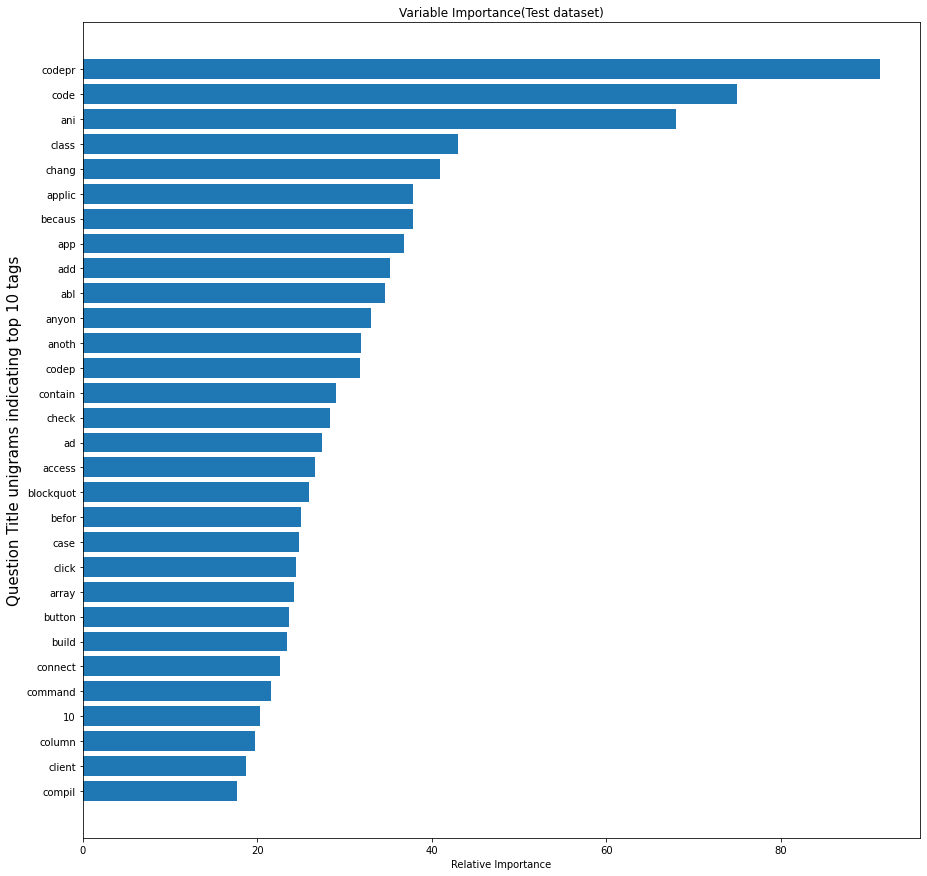

In [69]:
feature_importance = loaded_etc[1].estimator.feature_importances_

## make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(15,15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_actual_test.columns[sorted_idx])
plt.xlabel('Relative Importance', fontsize=10)
plt.ylabel('Question Title unigrams indicating top 10 tags', fontsize=15)
plt.title('Variable Importance(Test dataset)')
plt.savefig("./figures/Variables with most significant feature Importance_test dataset.png")
plt.show()

__Conclusion:__

__Prediction on unseen test data:__

- The accuracy comes to around 0.95 and Jaccard score - 0.89, f1-weighted score - 0.94 (using cross validation).
- Hamming Loss was also 0.869 indicating that there are a very small fraction of wrong labels to the total number of labels in the unseen dataset.
- Also, the prediction time is low - less than 5 seconds.
- There are very few false positives and false negatives i.e. incorrectly labeled tags.
- The model was fit very well and has been able to predict data on unseen test dataset pretty well, indicating that the model performed very well and didn't overfit on the training dataset.